# Pre-processing exercise

In this exercise you will pre-prcess the [California housing dataset](https://www.kaggle.com/camnugent/california-housing-prices).


The pre-processing needs to have the next parts:
- [ ] Basic inspection of the data.
- [ ] Dealing with missing values (you can choose what to do with them in each case).
- [ ] Finding outliers and decide what to do with them.
- [ ] Extract new variables.
- [ ] Transform all categorical variables into one-hot-encoding variables.
- [ ] Transform the numerical variables; you can use MinMax, Standarization, boxcox or any other transformation that makes sense.


In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.precision', 3)


In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
housing = pd.read_csv("housing.csv", header=0, delimiter=',')

# Display the first few rows
housing.head()

# Check the shape of the dataset
print(f"Dataset shape: {housing.shape}")

# Check data types and missing values
housing.info()

# Get statistical summary
housing.describe()

# Check for missing values
housing.isna().sum()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.325,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.301,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.257,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.643,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.846,342200.0,NEAR BAY


Dataset shape: (20640, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.00,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.54,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.33,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.00,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.00,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.00,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.00,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.00,15.000,500001.000


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: xlabel='longitude', ylabel='latitude'>

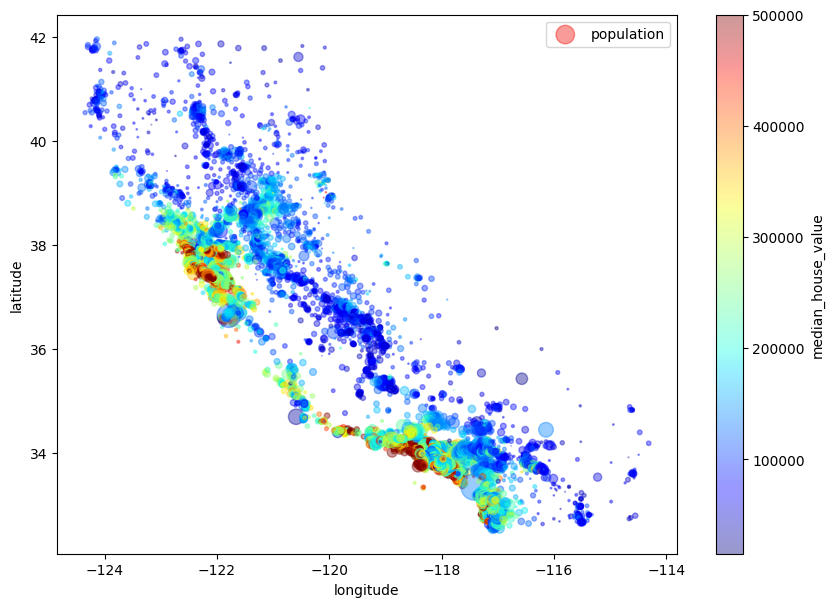

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [13]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000,20640.000,20640.000,20640.000,20433.000,20640.000,20640.00,20640.000,20640.000
mean,-119.570,35.632,28.639,2635.763,537.871,1425.477,499.54,3.871,206855.817
std,2.004,2.136,12.586,2181.615,421.385,1132.462,382.33,1.900,115395.616
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.00,0.500,14999.000
25%,-121.800,33.930,18.000,1447.750,296.000,787.000,280.00,2.563,119600.000
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.00,3.535,179700.000
75%,-118.010,37.710,37.000,3148.000,647.000,1725.000,605.00,4.743,264725.000
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.00,15.000,500001.000


In [6]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
# Check the percentage of missing values in each column
missing_percentage = housing.isna().mean() * 100
print("Missing values percentage by column:")
print(missing_percentage[missing_percentage > 0])

# Let's handle the missing values in total_bedrooms
# Option 1: Impute with median
housing['total_bedrooms_median_imputed'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].median())

# Option 2: Impute with KNN (already started in the initial code)
from sklearn.neighbors import KNeighborsClassifier

# Get rows with and without missing values
rows_not_missing = housing.total_bedrooms.notna()
rows_missing = housing.total_bedrooms.isna()

# Create a subset without the target column and the column with missing values
subset_of_housing = housing.drop(columns=['total_bedrooms', 'ocean_proximity'])

# Get the subset of data without missing values
housing_without_missings = subset_of_housing[rows_not_missing]

# Train KNN model on non-missing data
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(housing_without_missings, housing.total_bedrooms[rows_not_missing])

# Predict missing values
imputed_values = knn.predict(subset_of_housing[rows_missing])

# Fill missing values with KNN predictions
housing.loc[rows_missing, 'total_bedrooms'] = imputed_values

# Verify no more missing values
housing.isna().sum()

Missing values percentage by column:
total_bedrooms    1.003
dtype: float64


KNeighborsClassifier(n_neighbors=1)

longitude                        0
latitude                         0
housing_median_age               0
total_rooms                      0
total_bedrooms                   0
population                       0
households                       0
median_income                    0
median_house_value               0
ocean_proximity                  0
total_bedrooms_median_imputed    0
dtype: int64

<Figure size 1500x1000 with 0 Axes>

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'total_bedrooms_median_imputed'}>,
        <Axes: >, <Axes: >]], dtype=object)

<Figure size 1500x1000 with 0 Axes>

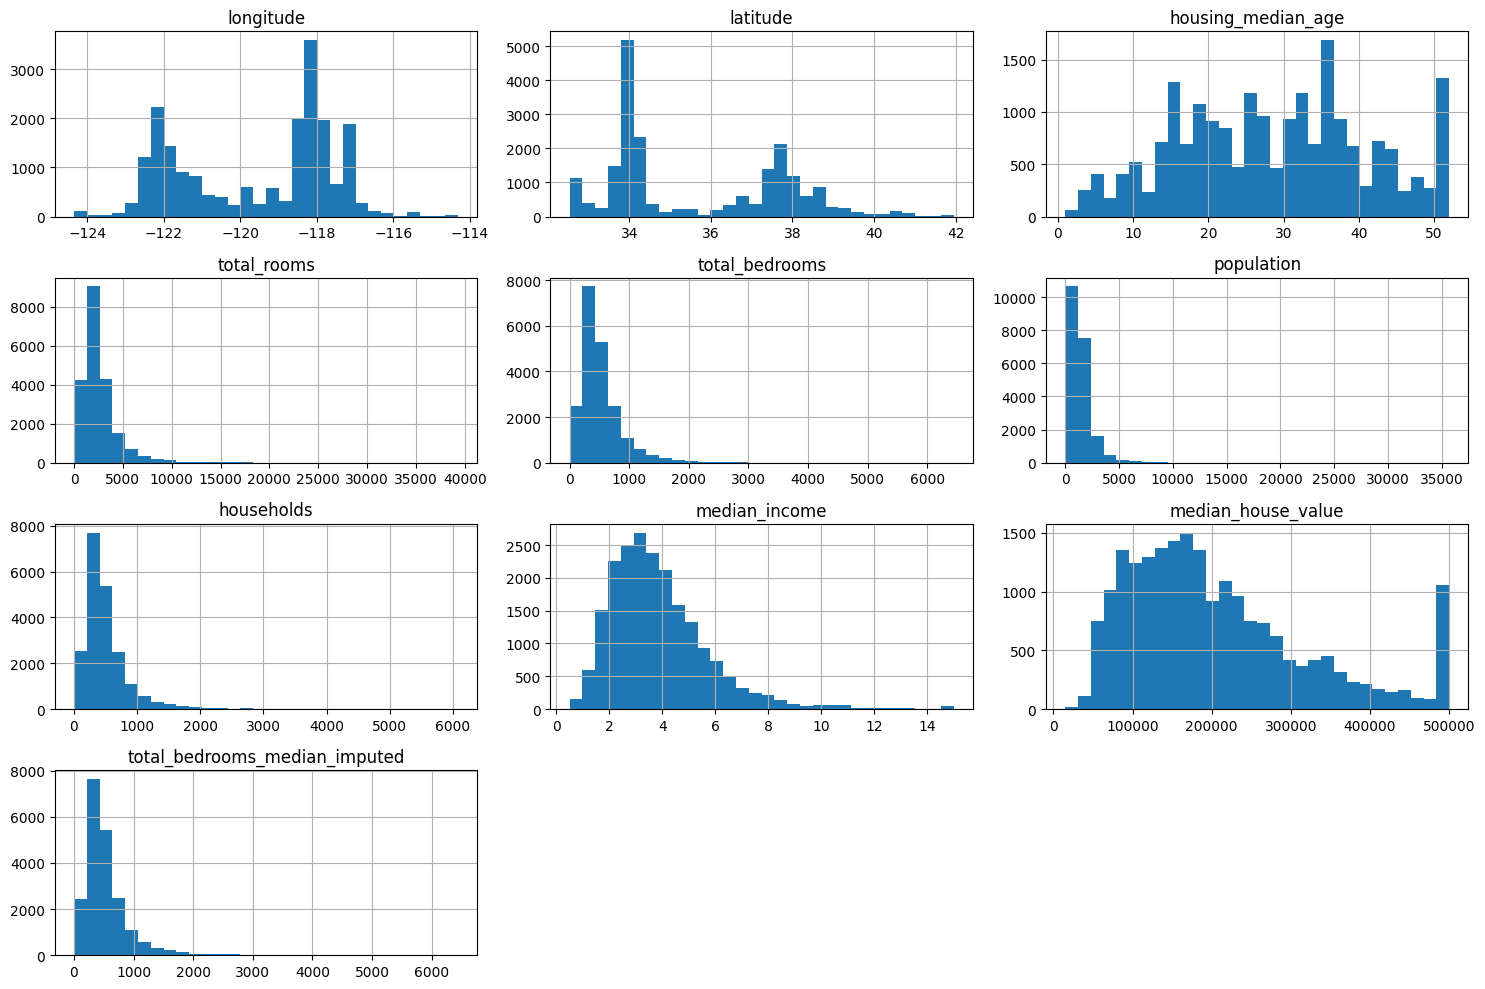

<Figure size 1500x800 with 0 Axes>

<Axes: >

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'longitude'),
  Text(2, 0, 'latitude'),
  Text(3, 0, 'housing_median_age'),
  Text(4, 0, 'total_rooms'),
  Text(5, 0, 'total_bedrooms'),
  Text(6, 0, 'population'),
  Text(7, 0, 'households'),
  Text(8, 0, 'median_income'),
  Text(9, 0, 'median_house_value'),
  Text(10, 0, 'total_bedrooms_median_imputed')])

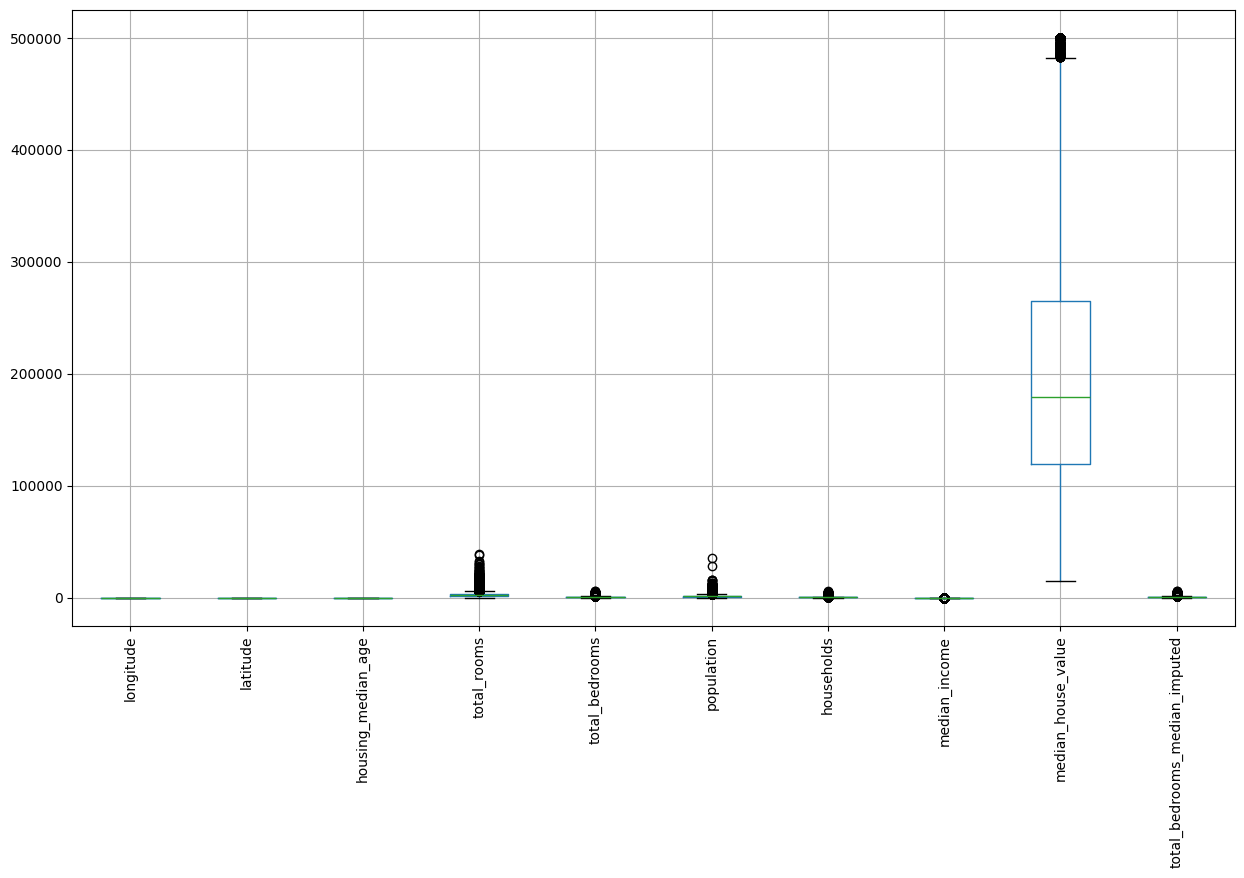

Outliers in median_house_value: 1071 (5.19%)
Range: -98087.50 - 482412.50
Outliers in median_income: 681 (3.30%)
Range: -0.71 - 8.01
Outliers in total_rooms: 1287 (6.24%)
Range: -1102.62 - 5698.38
Outliers in total_bedrooms: 1280 (6.20%)
Range: -229.00 - 1171.00
Outliers in population: 1196 (5.79%)
Range: -620.00 - 3132.00
Outliers in households: 1220 (5.91%)
Range: -207.50 - 1092.50


<Figure size 1000x500 with 0 Axes>

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Original median_house_value')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Capped median_house_value')

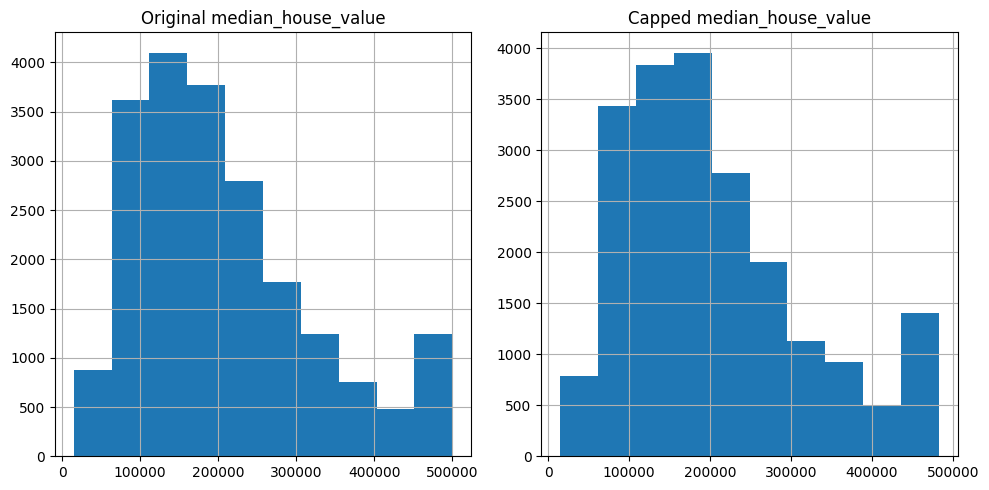

In [16]:
# Visualize distributions to identify potential outliers
plt.figure(figsize=(15, 10))
housing.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Use boxplots to identify outliers in numerical columns
plt.figure(figsize=(15, 8))
housing.boxplot(figsize=(15, 8))
plt.xticks(rotation=90)
plt.show()

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Check outliers for key numerical columns
numerical_cols = ['median_house_value', 'median_income', 'total_rooms', 'total_bedrooms', 'population', 'households']

for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(housing, col)
    print(f"Outliers in {col}: {len(outliers)} ({len(outliers)/len(housing)*100:.2f}%)")
    print(f"Range: {lower:.2f} - {upper:.2f}")
    
# Let's handle outliers in median_house_value (capping)
for col in numerical_cols:
    _, lower, upper = detect_outliers_iqr(housing, col)
    # Cap the outliers
    housing[f"{col}_capped"] = housing[col].clip(lower=lower, upper=upper)

# Compare original vs capped distributions for median_house_value
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
housing['median_house_value'].hist()
plt.title('Original median_house_value')
plt.subplot(1, 2, 2)
housing['median_house_value_capped'].hist()
plt.title('Capped median_house_value')
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

<Axes: >

<Axes: >

Text(0.5, 1.0, 'rooms_per_household')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'bedrooms_ratio')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'population_per_household')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'distance_to_la')

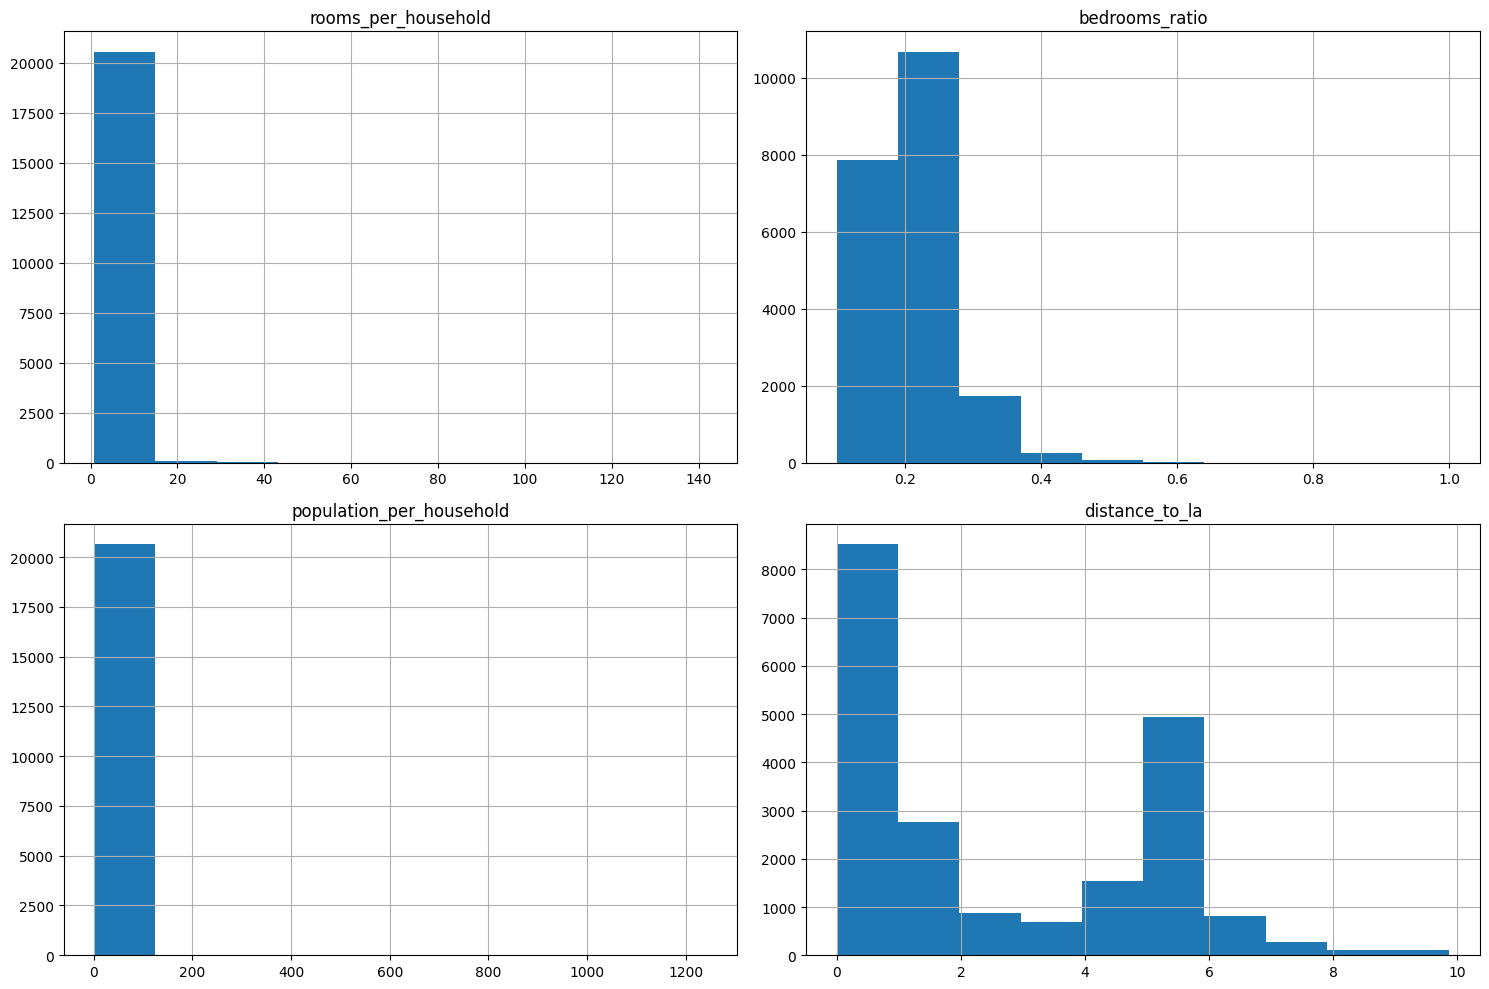

Correlations with median_house_value:
median_house_value               1.000
median_house_value_capped        1.000
median_income_capped             0.689
median_income                    0.688
total_rooms_capped               0.172
rooms_per_household              0.152
total_rooms                      0.134
housing_median_age               0.106
households_capped                0.079
households                       0.066
total_bedrooms_capped            0.061
total_bedrooms                   0.050
total_bedrooms_median_imputed    0.049
population_per_household        -0.024
population                      -0.025
population_capped               -0.033
longitude                       -0.046
distance_to_la                  -0.117
latitude                        -0.144
bedrooms_ratio                  -0.256
Name: median_house_value, dtype: float64


In [17]:
# Create some meaningful features based on existing ones

# Rooms per household
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']

# Bedrooms ratio
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']

# Population per household
housing['population_per_household'] = housing['population'] / housing['households']

# Location-based feature (distance from a reference point - LA)
# LA coordinates: latitude = 34.05, longitude = -118.24
la_lat, la_lon = 34.05, -118.24

# Calculate distance from LA
housing['distance_to_la'] = np.sqrt(
    (housing['latitude'] - la_lat) ** 2 + 
    (housing['longitude'] - la_lon) ** 2
)

# Income category (binning median_income)
housing['income_cat'] = pd.cut(
    housing['median_income'],
    bins=[0, 2, 3, 4, 5, np.inf],
    labels=[1, 2, 3, 4, 5]
)

# Visualize some of the new features
plt.figure(figsize=(15, 10))
for i, col in enumerate(['rooms_per_household', 'bedrooms_ratio', 'population_per_household', 'distance_to_la']):
    plt.subplot(2, 2, i+1)
    housing[col].hist()
    plt.title(col)
plt.tight_layout()
plt.show()

# Check correlation with median_house_value
correlations = housing.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)
print("Correlations with median_house_value:")
print(correlations)

In [18]:
# Check unique values in categorical columns
print(housing['ocean_proximity'].value_counts())

# Create one-hot encoding for ocean_proximity
ocean_proximity_encoded = pd.get_dummies(housing['ocean_proximity'], prefix='ocean')

# Add the one-hot encoded columns to the dataset
housing = pd.concat([housing, ocean_proximity_encoded], axis=1)

# Also one-hot encode the income_cat feature we created
income_cat_encoded = pd.get_dummies(housing['income_cat'], prefix='income_cat')
housing = pd.concat([housing, income_cat_encoded], axis=1)

# Verify the new columns
print("New columns after one-hot encoding:")
print(housing.columns[-10:])

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
New columns after one-hot encoding:
Index(['ocean_<1H OCEAN', 'ocean_INLAND', 'ocean_ISLAND', 'ocean_NEAR BAY',
       'ocean_NEAR OCEAN', 'income_cat_1', 'income_cat_2', 'income_cat_3',
       'income_cat_4', 'income_cat_5'],
      dtype='object')


<Figure size 1500x1000 with 0 Axes>

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Original')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Min-Max Scaled')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Standardized')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Robust Scaled')

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Box-Cox Transformed')

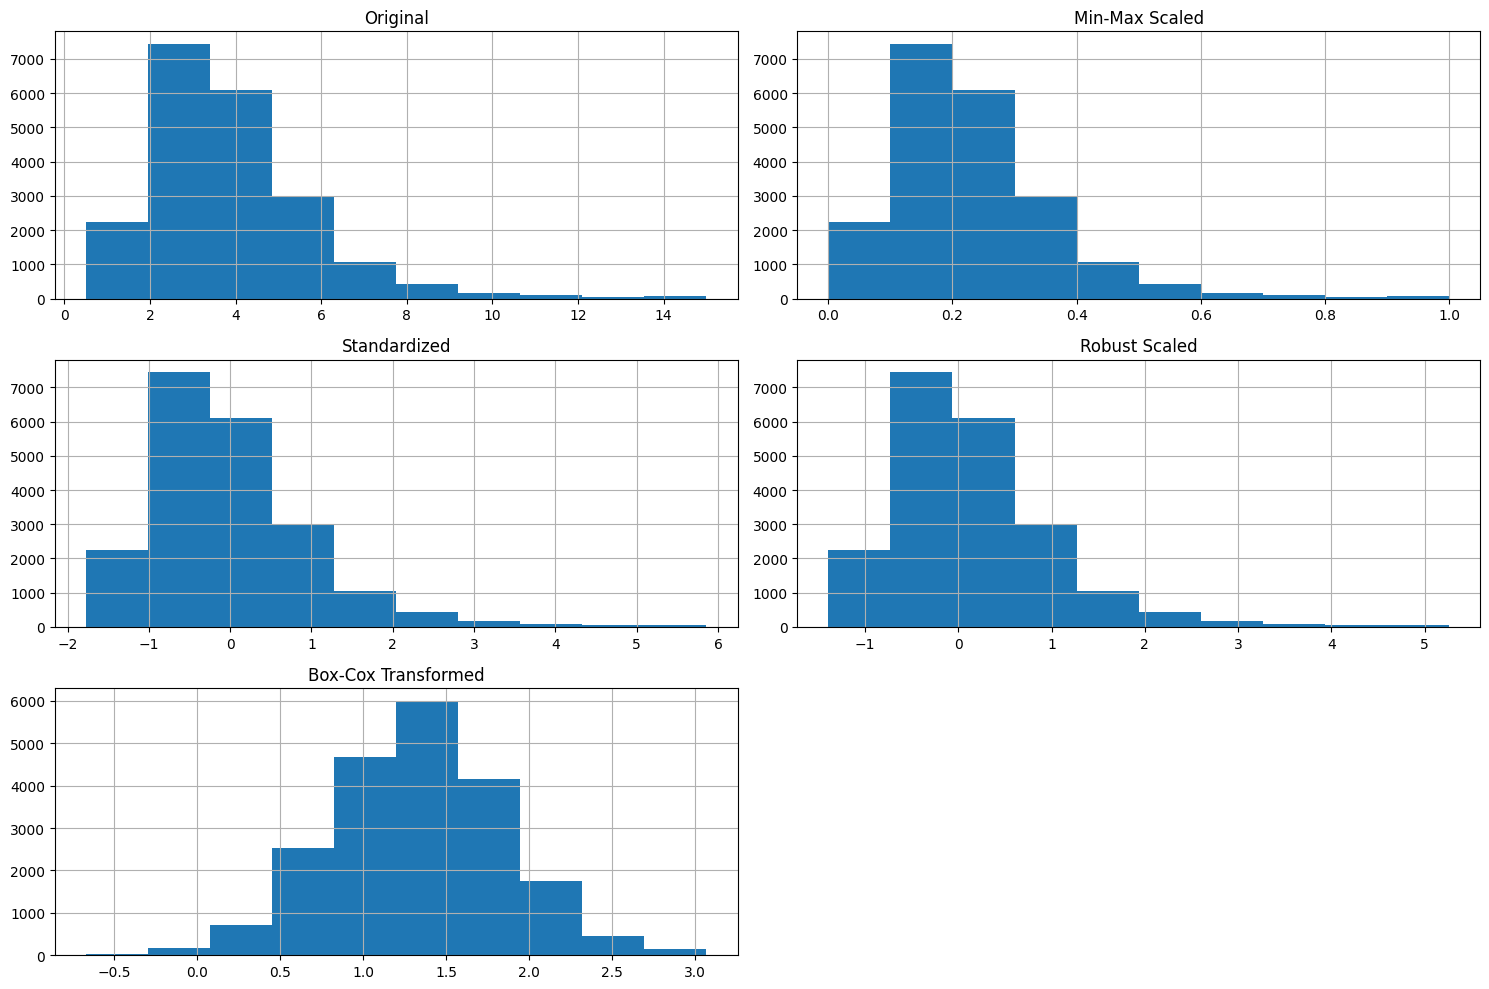

Correlations with median_house_value after standardization:
median_house_value           1.000
median_house_value_capped    1.000
median_income_capped         0.689
median_income                0.688
income_cat_5                 0.556
ocean_<1H OCEAN              0.257
total_rooms_capped           0.172
ocean_NEAR BAY               0.160
rooms_per_household          0.152
ocean_NEAR OCEAN             0.142
Name: median_house_value, dtype: float64


In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy import stats

# Select numerical features to transform (excluding the ones we created)
numerical_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
                       'total_bedrooms', 'population', 'households', 'median_income']

# Create copies for different scaling methods
housing_minmax = housing.copy()
housing_standard = housing.copy()
housing_robust = housing.copy()
housing_boxcox = housing.copy()

# Min-Max scaling (normalization)
minmax_scaler = MinMaxScaler()
housing_minmax[numerical_features] = minmax_scaler.fit_transform(housing[numerical_features])

# Standardization (z-score)
standard_scaler = StandardScaler()
housing_standard[numerical_features] = standard_scaler.fit_transform(housing[numerical_features])

# Robust scaling (using median and IQR)
robust_scaler = RobustScaler()
housing_robust[numerical_features] = robust_scaler.fit_transform(housing[numerical_features])

# Box-Cox transformation (for positive data)
for col in numerical_features:
    # Ensure all values are positive by shifting if needed
    if housing[col].min() <= 0:
        shift = abs(housing[col].min()) + 1
        housing_boxcox[col] = stats.boxcox(housing[col] + shift)[0]
    else:
        housing_boxcox[col] = stats.boxcox(housing[col])[0]

# Compare distributions before and after transformations for median_income
plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
housing['median_income'].hist()
plt.title('Original')

plt.subplot(3, 2, 2)
housing_minmax['median_income'].hist()
plt.title('Min-Max Scaled')

plt.subplot(3, 2, 3)
housing_standard['median_income'].hist()
plt.title('Standardized')

plt.subplot(3, 2, 4)
housing_robust['median_income'].hist()
plt.title('Robust Scaled')

plt.subplot(3, 2, 5)
housing_boxcox['median_income'].hist()
plt.title('Box-Cox Transformed')

plt.tight_layout()
plt.show()

# Check correlations after transformations
print("Correlations with median_house_value after standardization:")
print(housing_standard.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False).head(10))

In [14]:
subset_of_housing = housing.drop(columns=['total_bedrooms','ocean_proximity'])

In [13]:
subset_of_housing.shape
housing.shape

(20640, 8)

(20640, 10)

In [8]:
rows_not_missing = housing.total_bedrooms.notna()
rows_missing = housing.total_bedrooms.isna()
rows_not_missing.sum()
rows_missing.sum()

np.int64(20433)

np.int64(207)

In [10]:
housing_without_missings = subset_of_housing[rows_not_missing]
housing_without_missings.shape

NameError: name 'subset_of_housing' is not defined

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(housing_without_missings, housing.total_bedrooms[rows_not_missing])
imputed_values = knn.predict(subset_of_housing[rows_missing]);

In [ ]:
housing.loc[rows_missing, 'total_bedrooms'] = imputed_values

In [ ]:
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

<Axes: >

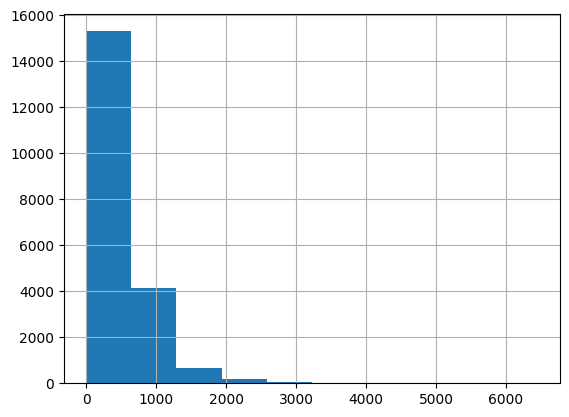

In [17]:
housing.total_bedrooms.hist()

In [20]:
# Select the final processed dataset (you can choose which scaling method you prefer)
processed_housing = housing_standard.copy()

# Keep only useful columns (drop intermediate columns and original categoricals)
# Columns to drop could include the original ones we transformed, non-capped versions, etc.
# This would depend on which specific columns you want in your final dataset

# Save the processed dataset
processed_housing.to_csv("housing_processed.csv", index=False)

print("Preprocessing completed successfully!")

Preprocessing completed successfully!
